## A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## Importing necessary libraries

In [80]:

import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv(r"C:\Users\yavar\DS_Assignments\22.Simple Linear Regression\emp_data.csv")


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [166]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [167]:
df.rename(columns={'Salary_hike':'sh','Churn_out_rate':'cr'}, inplace=True)

In [168]:
df.isnull().sum()

sh    0
cr    0
dtype: int64

## Box plot, Scatter plot and Skewness

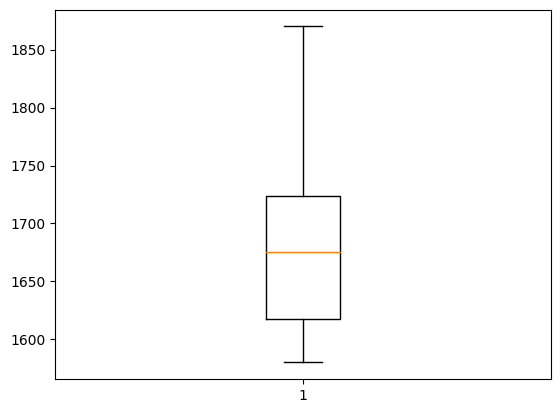

In [198]:
plt.boxplot(df['sh']);

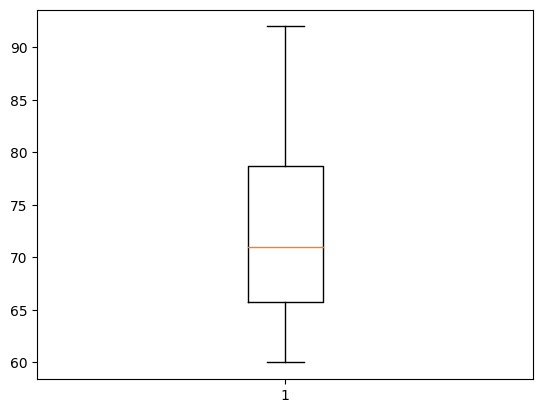

In [199]:
plt.boxplot(df['cr']);

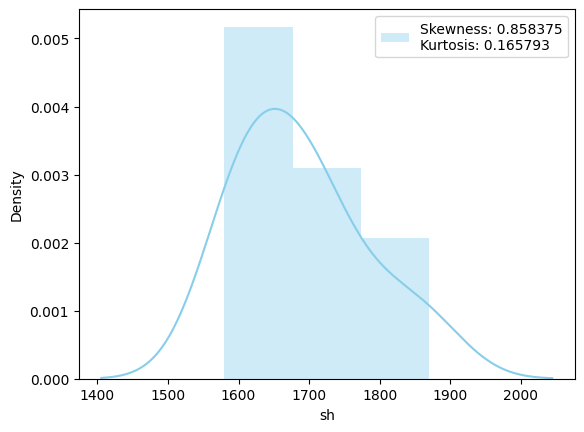

In [171]:
sns.distplot( df['sh'] , color="skyblue",label = "Skewness: %f" % df['sh'].skew() + "\n" + "Kurtosis: %f" % df['sh'].kurt())
plt.legend();

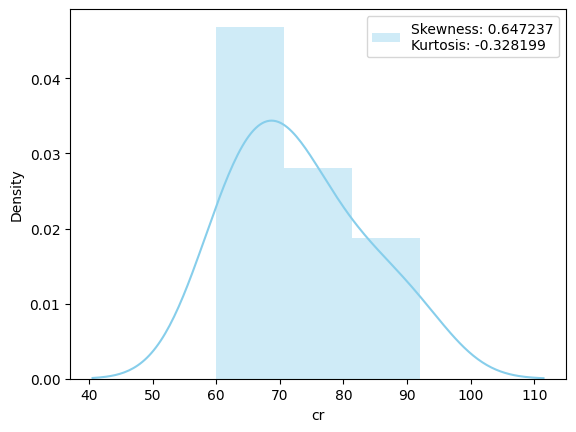

In [172]:
sns.distplot( df['cr'] , color="skyblue",label = "Skewness: %f" % df['cr'].skew() + "\n" + "Kurtosis: %f" % df['cr'].kurt())
plt.legend();


In [173]:
corre = np.corrcoef(df['sh'],df['cr'])
print(corre)

[[ 1.         -0.91172162]
 [-0.91172162  1.        ]]


In [174]:
cov = np.cov(df['sh'],df['cr'])
print(cov)

[[8481.82222222 -861.26666667]
 [-861.26666667  105.21111111]]


# Simple Linear Regression 

In [175]:
x=np.array(df.sh).reshape(-1,1)
y=np.array(df.cr).reshape(-1,1)

In [176]:
model = LinearRegression()
model.fit(x,y)

print(model.score(x, y))

0.831236309988375


In [177]:
pred1= model.predict(pd.DataFrame(df['sh']))

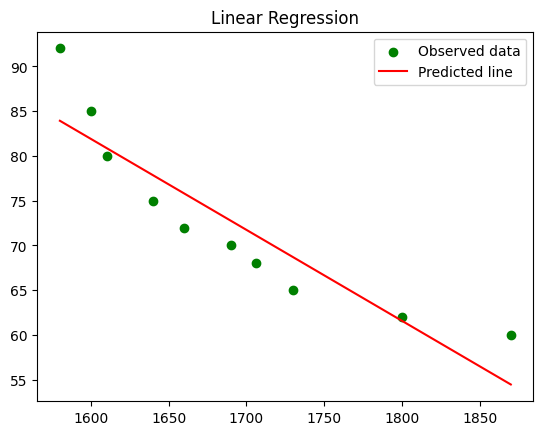

In [178]:
# plt.scatter(df['dt'],df['st']);
plt.scatter(x,y, color = 'green')
plt.plot(df.sh,pred1,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [179]:
regression_model_mse = mean_squared_error(x,y)

MSE = math.sqrt(regression_model_mse)
print("MSE             : ", MSE)
Rsqr = model.score(x,y)
print("R squared value :",Rsqr)

MSE             :  1618.5688431450792
R squared value : 0.831236309988375


In [180]:
print("Coefficient b0 :",model.coef_[0])
print("Intercept b1   :",model.intercept_[0])

Coefficient b0 : [-0.10154265]
Intercept b1   : 244.36491110400797


In [181]:
y_predicted = model.predict(x)
y_actual = y
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

print(rmse(y_predicted,y_actual))

3.9975284623377942


In [183]:
import statsmodels.formula.api as smf

model = smf.ols('cr ~ sh',data = df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cr   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           0.000239
Time:                        07:53:44   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
sh            -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Applied log for x variable


In [184]:
df["sh_log"]=np.log(df['sh'])

In [186]:
model2 = smf.ols("cr~sh_log",data= df).fit()

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cr   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           0.000153
Time:                        07:54:41   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1381.4562    195.402      7.070      0.000     930.858    1832.054
sh_log      -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
corre = np.corrcoef(df['sh_log'],df['sh'])
print(corre)

[[1.         0.99966952]
 [0.99966952 1.        ]]


In [188]:
pred2= model2.predict(df['sh_log'])

In [189]:
pred2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

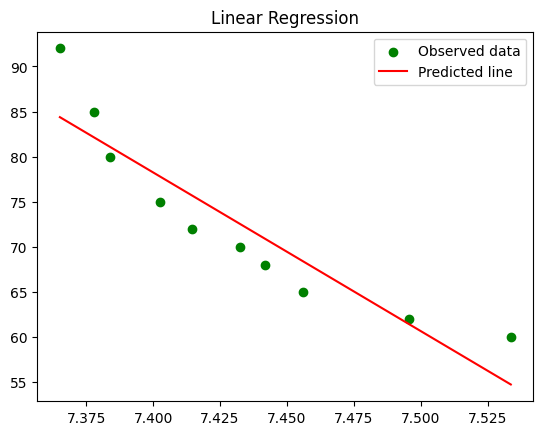

In [190]:

plt.scatter(df.sh_log,y, color = 'green')
plt.plot(df.sh_log,pred2,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

## Observed sligh variation in the r^2 values and Correlation and # Applying log function to Target Variabvle.

In [200]:
df['cr_log']=np.log(df['cr'])

In [201]:
corre = np.corrcoef(df['sh'],df['cr_log'])
print(corre)

[[ 1.         -0.93463607]
 [-0.93463607  1.        ]]


In [202]:
model3 = smf.ols("cr_log~sh",data= df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cr_log   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           7.38e-05
Time:                        08:01:25   Log-Likelihood:                 16.511
No. Observations:                  10   AIC:                            -29.02
Df Residuals:                       8   BIC:                            -28.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6383      0.318     20.902      0.000       5.906       7.371
sh            -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
corre = np.corrcoef(df['sh_log'],df['cr_log'])
print(corre)

[[ 1.         -0.94291704]
 [-0.94291704  1.        ]]


In [205]:
model4 = smf.ols("cr_log~sh_log",data= df).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cr_log   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     64.13
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           4.33e-05
Time:                        08:02:11   Log-Likelihood:                 17.167
No. Observations:                  10   AIC:                            -30.33
Df Residuals:                       8   BIC:                            -29.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2472      2.244      9.916      0.000      17.073      27.421
sh_log        -2.4180      0.302     -8.008      0.000      -3.114      -1.722
==============================================================================
Omnibus:                        1.962   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.329
Skew:                           0.786   Prob(JB):                        0.515
Kurtosis:                       2.151   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Model4 has the best value of R2 value and p values.
